In [1]:
# splitting caltech 256 into training and testing data we save filenames in text files
import os
import fnmatch
import shutil
import random
import math

# tarining data 80 % of caltech256
training_ratio=0.8


training_flie=open("training_file.txt",'w')
testing_file=open("testing_file.txt",'w')
classes=open("classes.txt",'w')
folders=os.listdir("./256_ObjectCategories/")
# print(len(folders))
for i in folders:
    path="./256_ObjectCategories/"+i+"/"
    images=[f for f in os.listdir(path) if f.endswith('.jpg')]
    classes.writelines(i[0:3]+" "+i+" "+str(len(images))+'\n')
    index = random.sample(range(0, len(images)), int(math.floor(training_ratio*len(images))))	
    # index = random.sample(range(0, len(file1)), int(math.floor(0.8*len(file1))))

    training=[]
    testing=[]
    for im in range(len(images)):
        if im in index:
            # write in training
            # print("train")
            training_flie.writelines(images[im]+"\n")
        else:
            testing_file.writelines(images[im]+"\n")
            # write in testing
            # print("test")
    print("done with folder"+i)

training_flie.close()
testing_file.close()
classes.close()





done with folder001.ak47
done with folder002.american-flag
done with folder003.backpack
done with folder004.baseball-bat
done with folder005.baseball-glove
done with folder006.basketball-hoop
done with folder007.bat
done with folder008.bathtub
done with folder009.bear
done with folder010.beer-mug
done with folder011.billiards
done with folder012.binoculars
done with folder013.birdbath
done with folder014.blimp
done with folder015.bonsai-101
done with folder016.boom-box
done with folder017.bowling-ball
done with folder018.bowling-pin
done with folder019.boxing-glove
done with folder020.brain-101
done with folder021.breadmaker
done with folder022.buddha-101
done with folder023.bulldozer
done with folder024.butterfly
done with folder025.cactus
done with folder026.cake
done with folder027.calculator
done with folder028.camel
done with folder029.cannon
done with folder030.canoe
done with folder031.car-tire
done with folder032.cartman
done with folder033.cd
done with folder034.centipede
done

done with folder052.crab-101
done with folder053.desk-globe
done with folder054.diamond-ring
done with folder055.dice
done with folder056.dog
done with folder057.dolphin-101
done with folder058.doorknob
done with folder059.drinking-straw
done with folder060.duck
done with folder061.dumb-bell
done with folder062.eiffel-tower
done with folder063.electric-guitar-101
done with folder064.elephant-101
done with folder065.elk
done with folder066.ewer-101
done with folder067.eyeglasses
done with folder068.fern
done with folder069.fighter-jet
done with folder070.fire-extinguisher
done with folder071.fire-hydrant
done with folder072.fire-truck
done with folder073.fireworks
done with folder074.flashlight
done with folder075.floppy-disk
done with folder076.football-helmet
done with folder077.french-horn
done with folder078.fried-egg
done with folder079.frisbee
done with folder080.frog
done with folder081.frying-pan
done with folder082.galaxy
done with folder083.gas-pump
done with folder084.giraffe

In [2]:
#now we are done with the splitting of data now we need to get image list with the path
#in order to extract features

training_img_list=[]
tf = open("training_file.txt",'r')
training_img_list = tf.readlines()
tf.close()
print(len(training_img_list))
print(training_img_list[len(training_img_list)-1])
print(type(training_img_list[75]))


24385
257_0827.jpg

<class 'str'>


In [3]:
# now before giving it to CNN model, we need to find out each files path with the help of classes.txt file..


f=open("classes.txt","r")
lines=f.readlines()
f.close()
Dict={}
for i in lines:
    l1=i.split(' ')
    Dict[l1[0]] = l1[1]
    
print(Dict)


{'001': '001.ak47', '002': '002.american-flag', '003': '003.backpack', '004': '004.baseball-bat', '005': '005.baseball-glove', '006': '006.basketball-hoop', '007': '007.bat', '008': '008.bathtub', '009': '009.bear', '010': '010.beer-mug', '011': '011.billiards', '012': '012.binoculars', '013': '013.birdbath', '014': '014.blimp', '015': '015.bonsai-101', '016': '016.boom-box', '017': '017.bowling-ball', '018': '018.bowling-pin', '019': '019.boxing-glove', '020': '020.brain-101', '021': '021.breadmaker', '022': '022.buddha-101', '023': '023.bulldozer', '024': '024.butterfly', '025': '025.cactus', '026': '026.cake', '027': '027.calculator', '028': '028.camel', '029': '029.cannon', '030': '030.canoe', '031': '031.car-tire', '032': '032.cartman', '033': '033.cd', '034': '034.centipede', '035': '035.cereal-box', '036': '036.chandelier-101', '037': '037.chess-board', '038': '038.chimp', '039': '039.chopsticks', '040': '040.cockroach', '041': '041.coffee-mug', '042': '042.coffin', '043': '043.

In [4]:
# lets import all pkgs for CNN feature extraction

import os
import h5py
import numpy as np
import argparse

from extract_cnn_vgg16_keras import VGGNet
print("import done")

import done


In [5]:
print("./256_ObjectCategories/"+Dict[training_img_list[0][0:3]]+training_img_list[0])

./256_ObjectCategories/001.ak47001_0001.jpg



In [6]:
model=VGGNet()
feats=model.extract_feat("./256_ObjectCategories/"+Dict[training_img_list[0][0:3]]+"/"+training_img_list[0].rstrip('\n'))
print("done")

1/1 [==============================] - 1s 941ms/step
done


In [7]:
feats = []
names = []
model = VGGNet()
#loop to iterate through entire database
for i, img in enumerate(training_img_list):
    newpath="./256_ObjectCategories/"+Dict[img[0:3]]+"/"+img.rstrip('\n')
    
    norm_feat = model.extract_feat(newpath)
    img_name = img.rstrip('\n')
    #print(newpath+" "+str(i)+"imgnm:"+ img_name +" len: "+str(len(img_name)))
    feats.append(norm_feat)
    names.append(img_name)
    print("extracting feature from image No. %d , %d images in total" %((i+1), len(training_img_list)))

1/1 [==============================] - 1s 859ms/step
extracting feature from image No. 1 , 24385 images in total
1/1 [==============================] - 1s 1s/step
extracting feature from image No. 2 , 24385 images in total
1/1 [==============================] - 1s 1s/step
extracting feature from image No. 3 , 24385 images in total
1/1 [==============================] - 1s 1s/step
extracting feature from image No. 4 , 24385 images in total
1/1 [==============================] - 1s 960ms/step
extracting feature from image No. 5 , 24385 images in total
1/1 [==============================] - 1s 1s/step
extracting feature from image No. 6 , 24385 images in total
1/1 [==============================] - 1s 1s/step
extracting feature from image No. 7 , 24385 images in total
1/1 [==============================] - 1s 1s/step
extracting feature from image No. 8 , 24385 images in total
1/1 [==============================] - 1s 1s/step
extracting feature from image No. 9 , 24385 images in total
1/1 

KeyboardInterrupt: 

In [ ]:
#close h5 files if open this is optional
#we need to convert its type to np array
#in order to make calculations easier by numpy like matrix multiplication
feats=np.array(feats)
print("conversion complete")
print(type(feats))
#keras store features in h5p format so naming a file.
output="features.h5"
h5f = h5py.File(output, 'w')
h5f.create_dataset('dataset_1', data = feats)
#h5f.create_dataset('dataset_2', data = names)
h5f.create_dataset('dataset_2', data = np.string_(names))
h5f.close()
print("file output completed.. features stored")

conversion complete
<class 'numpy.ndarray'>
file output completed.. features stored


In [10]:
# we have features stored. in features.h5 file.
#now lets see its accuracy with the testing data. test images are stored in txt file
f=open("testing_file.txt","r")
test_data=f.readlines()
f.close()
print("length: "+str(len(test_data))+"  sample name:"+ test_data[len(test_data)-1])
# we already have dictionary derived from classes.txt.. which maps str to str real class of img

length: 6222  sample name:257_0821.jpg



In [11]:
print("importing pkgs")
from extract_cnn_vgg16_keras import VGGNet

import numpy as np
import h5py
import os

import  matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import argparse

print("import done!")




importing pkgs


import done!


In [12]:
print("reading features")
output="features.h5"
h5f = h5py.File(output,'r') # dont forget to close after use
#features are dataset1
imgFeats = h5f['dataset_1'][:]

print(imgFeats)
imgNames = h5f['dataset_2'][:]
print(imgNames)
h5f.close()

reading features
[[0.         0.         0.         ... 0.03445824 0.01846131 0.        ]
 [0.         0.08453806 0.         ... 0.0358423  0.06873096 0.00633202]
 [0.03530692 0.00525013 0.03635702 ... 0.13158433 0.01235775 0.05653542]
 ...
 [0.         0.17778616 0.04150952 ... 0.         0.04570942 0.03631085]
 [0.02950143 0.         0.         ... 0.0901867  0.02486948 0.0311034 ]
 [0.         0.00135454 0.00706682 ... 0.         0.02231024 0.        ]]
[b'001_0001.jpg' b'001_0002.jpg' b'001_0004.jpg' ... b'257_0823.jpg'
 b'257_0824.jpg' b'257_0825.jpg']


In [13]:
# precision of just one image top 30 images
#experimental purpose

import numpy as np
model=VGGNet()
maxpredictions=20


precision_vector=np.zeros(shape=(len(test_data),maxpredictions))
itr=514
imgclass=Dict[test_data[itr][0:3]]
queryVec = model.extract_feat("./256_ObjectCategories/"+Dict[test_data[itr][0:3]]+"/"+test_data[itr].rstrip('\n'))
scores = np.dot(queryVec, imgFeats.T)
rank_ID = np.argsort(scores)[::-1]
rank_score = scores[rank_ID]
print("ranking done")
#print(enumerate(rank_ID[0:maxpredictions]))
imlist = [imgNames[index] for i,index in enumerate(rank_ID[0:maxpredictions])]
#print("top %d images in order are: " %maxpredictions, imlist)
total_predictions=len(imlist)
correct_predictions=0
for k in range(total_predictions):
    kclass=Dict[imlist[k].decode('utf-8')[0:3]]
    print(kclass)
    if(imgclass==kclass):
        correct_predictions+=1
    precision_vector[itr][k]=correct_predictions/(k+1)
print(precision_vector[itr])    

1/1 [==============================] - 1s 738ms/step
ranking done
020.brain-101
020.brain-101
020.brain-101
020.brain-101
020.brain-101
020.brain-101
020.brain-101
020.brain-101
020.brain-101
020.brain-101
020.brain-101
020.brain-101
020.brain-101
020.brain-101
020.brain-101
020.brain-101
020.brain-101
020.brain-101
020.brain-101
020.brain-101
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [14]:
#calculating precision

import numpy as np
model=VGGNet()
maxpredictions=20


precision_vector=np.zeros(len(test_data))
for itr in range(len(test_data)):
    imgclass=Dict[test_data[itr][0:3]]
    queryVec = model.extract_feat("./256_ObjectCategories/"+Dict[test_data[itr][0:3]]+"/"+test_data[itr].rstrip('\n'))
    scores = np.dot(queryVec, imgFeats.T)
    rank_ID = np.argsort(scores)[::-1]
    rank_score = scores[rank_ID]
    #print("ranking done")
    #print(enumerate(rank_ID[0:maxpredictions]))
    imlist = [imgNames[index] for i,index in enumerate(rank_ID[0:maxpredictions])]
    #print("top %d images in order are: " %maxpredictions, imlist)
    total_predictions=len(imlist)
    correct_predictions=0
    for k in range(total_predictions):
        kclass=Dict[imlist[k].decode('utf-8')[0:3]]
        #print(kclass)
        if(imgclass==kclass):
            correct_predictions+=1
    precision_vector[itr]=correct_predictions/total_predictions
    print(str(itr)+"out of "+str(len(test_data))+" "+kclass+": "+str(precision_vector[itr]))    

1/1 [==============================] - 1s 779ms/step
0out of 6222 001.ak47: 1.0
1/1 [==============================] - 1s 757ms/step
1out of 6222 112.human-skeleton: 0.1
1/1 [==============================] - 1s 666ms/step
2out of 6222 001.ak47: 0.95
1/1 [==============================] - 1s 690ms/step
3out of 6222 001.ak47: 1.0
1/1 [==============================] - 1s 671ms/step
4out of 6222 001.ak47: 0.9
1/1 [==============================] - 1s 655ms/step
5out of 6222 150.octopus: 0.1
1/1 [==============================] - 1s 669ms/step
6out of 6222 001.ak47: 0.95
1/1 [==============================] - 1s 713ms/step
7out of 6222 001.ak47: 1.0
1/1 [==============================] - 1s 787ms/step
8out of 6222 001.ak47: 0.95
1/1 [==============================] - 1s 687ms/step
9out of 6222 001.ak47: 0.7
1/1 [==============================] - 1s 665ms/step
10out of 6222 001.ak47: 0.95
1/1 [==============================] - 1s 656ms/step
11out of 6222 001.ak47: 0.95
1/1 [===============

In [15]:
mean_avg_precision=np.sum(precision_vector)/len(test_data)
print(mean_avg_precision)

0.567156862745098


In [16]:

#this is to plot graph
import numpy as np
model=VGGNet()
maxpredictions=20


precision_vector=np.zeros(shape=(len(test_data),maxpredictions))
for itr in range(len(test_data)):
    imgclass=Dict[test_data[itr][0:3]]
    queryVec = model.extract_feat("./256_ObjectCategories/"+Dict[test_data[itr][0:3]]+"/"+test_data[itr].rstrip('\n'))
    scores = np.dot(queryVec, imgFeats.T)
    rank_ID = np.argsort(scores)[::-1]
    rank_score = scores[rank_ID]
    #print("ranking done")
    #print(enumerate(rank_ID[0:maxpredictions]))
    imlist = [imgNames[index] for i,index in enumerate(rank_ID[0:maxpredictions])]
    #print("top %d images in order are: " %maxpredictions, imlist)
    total_predictions=len(imlist)
    correct_predictions=0
    for k in range(total_predictions):
        kclass=Dict[imlist[k].decode('utf-8')[0:3]]
        #print(kclass)
        if(imgclass==kclass):
            correct_predictions+=1
        precision_vector[itr][k]=correct_predictions/(k+1)
    print(str(itr)+"out of "+str(len(test_data))+" "+kclass)    

1/1 [==============================] - 0s 281ms/step
0out of 6222 001.ak47
1/1 [==============================] - 0s 293ms/step
1out of 6222 112.human-skeleton
1/1 [==============================] - 0s 295ms/step
2out of 6222 001.ak47
1/1 [==============================] - 0s 290ms/step
3out of 6222 001.ak47
1/1 [==============================] - 0s 301ms/step
4out of 6222 001.ak47
1/1 [==============================] - 0s 302ms/step
5out of 6222 150.octopus
1/1 [==============================] - 0s 295ms/step
6out of 6222 001.ak47
1/1 [==============================] - 0s 294ms/step
7out of 6222 001.ak47
1/1 [==============================] - 0s 302ms/step
8out of 6222 001.ak47
1/1 [==============================] - 0s 291ms/step
9out of 6222 001.ak47
1/1 [==============================] - 0s 296ms/step
10out of 6222 001.ak47
1/1 [==============================] - 0s 305ms/step
11out of 6222 001.ak47
1/1 [==============================] - 0s 334ms/step
12out of 6222 173.rifle
1/1 [===

In [17]:
len(precision_vector[0])

20

In [18]:
avg_precision_vector=np.zeros(len(precision_vector[0]))
for j in range(len(precision_vector[0])):
    sum=0
    for i in range(len(precision_vector)):
        sum+=precision_vector[i][j]
    avg_precision_vector[j]=sum/len(precision_vector)
print(avg_precision_vector)
    

[0.94390871 0.82312761 0.76877746 0.73489232 0.70951463 0.68986392
 0.67302659 0.65965526 0.64779099 0.63749598 0.62812308 0.61886585
 0.61110699 0.60381366 0.59703204 0.59056573 0.58410384 0.57806529
 0.57260316 0.56715686]


[1, 6, 11, 16, 20]
[0.9439087110253938, 0.6898639237115611, 0.6281230823178748, 0.5905657344905175, 0.5671568627450976]


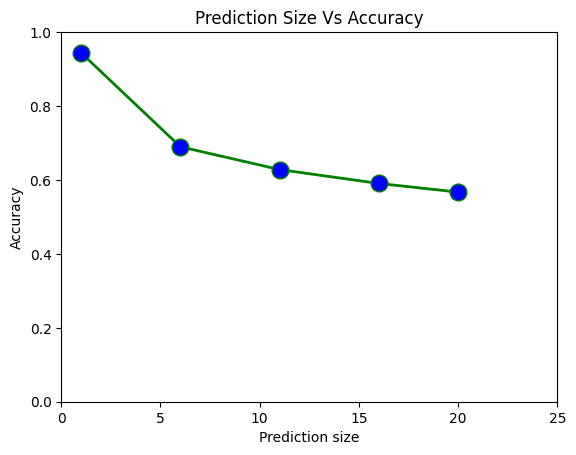

In [20]:

import matplotlib.pyplot as plt 
%matplotlib inline

x=[]
y=[]
#taking points at interval of 5 
for i in range(0,len(avg_precision_vector)):
    if i%5==0:
        y.append(avg_precision_vector[i])
        x.append(i+1)
#appending last element in x,y
y.append(avg_precision_vector[len(avg_precision_vector)-1])
x.append(len(avg_precision_vector))
print(x)
print(y)
# x axis values 
#y  = [0.70572163,0.64660881,  0.60308582, 0.57274188, 0.54742044]
# corresponding y axis values 
#x = [1,5,10,15,20]
#print(y)
  
# plotting the points  
plt.plot(x, y, color='green', linewidth = 2, 
         marker='o', markerfacecolor='blue', markersize=12) 
  
# setting x and y axis range 
plt.ylim(0,1) 
plt.xlim(0,25) 
  
# naming the x axis 
plt.ylabel('Accuracy') 
# naming the y axis 
plt.xlabel('Prediction size') 
  
# giving a title to my graph 
plt.title('Prediction Size Vs Accuracy') 
  
# function to show the plot 
plt.show()